# Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
def impute_median(df):
    """
    Function to impute missing values with median
    Args:
        df (pandas dataframe): dataframe
    Returns:
        df (pandas dataframe): dataframe with missing values impted
    """
    
    null_val = (df.isnull()  # check for null values
                    .sum()  # sum of null values
                    .sort_values(ascending=False)  # sort values in descending order 
                    .reset_index()) # reset index
    null_val.columns = ['attribute', 'count']  # rename columns
    
    # Iterate through df to impute median
    for index, row in null_val.iterrows():
        if row['count'] > 0:  # if null values exist
            print(f"{row['attribute']} has {row['count']} null values")  
            df.loc[(df[row['attribute']].isnull()==True), row['attribute']] = df[row['attribute']].median()
        else:
            continue
    return df
    """
    The other way to impute missing values with median
    df = df.fillna(df.median())
    """

In [ ]:
def log_transform(df, cols):
    """
    Function to log transformation
    
    Args:
        df (pandas dataframe): dataframe
        cols (list): list of columns to be transformed
    
    Returns:
        df (pandas dataframe): dataframe with log transformed columns
    """
    
    for col in cols:
        try:
            df[col] = np.log(1 + df[col])
        except:
            print(f"{col} unsuccessful")
    return df

In [ ]:
def iqr_outlier_removal(df, attribute_list):
    """
    Function to remove outliers using IQR method
    """
    
    def identify_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        ls = df.index[(df[column]<lower) | (df[column] > upper)]  # returns list of indices for outliers
        return ls
    def extract_outliers(df, attribute_list):
        """
        Function to extract indentified outliters
        """
        outliers = []  # initialize empty list
        
        for column in df[attribute_list].columns:
            outliers.extend(identify_outliers(df, column))
        return outliers
    def remove_outliers(df, ls):
        "Remove outliers"
        ls = sorted(set(ls))
        df = df.drop(ls)
        return df
    
    list_of_outlier_indices = extract_outliers(df, attribute_list)
    outliers_removed  = remove_outliers(df, list_of_outlier_indices)
    return outliers_removed
        

In [ ]:
def apply_pca(data, n_components = 2):
    """
    Function to apply PCa to reduce 
    Args: 
        data (dataframe): data file for user attributes
        n_components (int): number of components in PCA, default as 2
    Returns: 
        pca_df (dataframe): data file with principal components
        pca_fit (dataframe): fitted PCA
    """
    pca = PCA(n_components)  # PCA
    pca_fit = pca.fit_transform(data)  # reduce the dimensions of the data 
    # dataframe for first 2 PCs
    pca_df = pd.DataFrame(pca_fit,
                          columns = ['PC1', 'PC2'],
                          index = data.index.copy())  # set yara_user_id as index
    
    return pca_df, pca

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/credit-card-clustering/data/CC GENERAL.csv")
data = df.set_index('CUST_ID')  # set index to CUST_ID
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


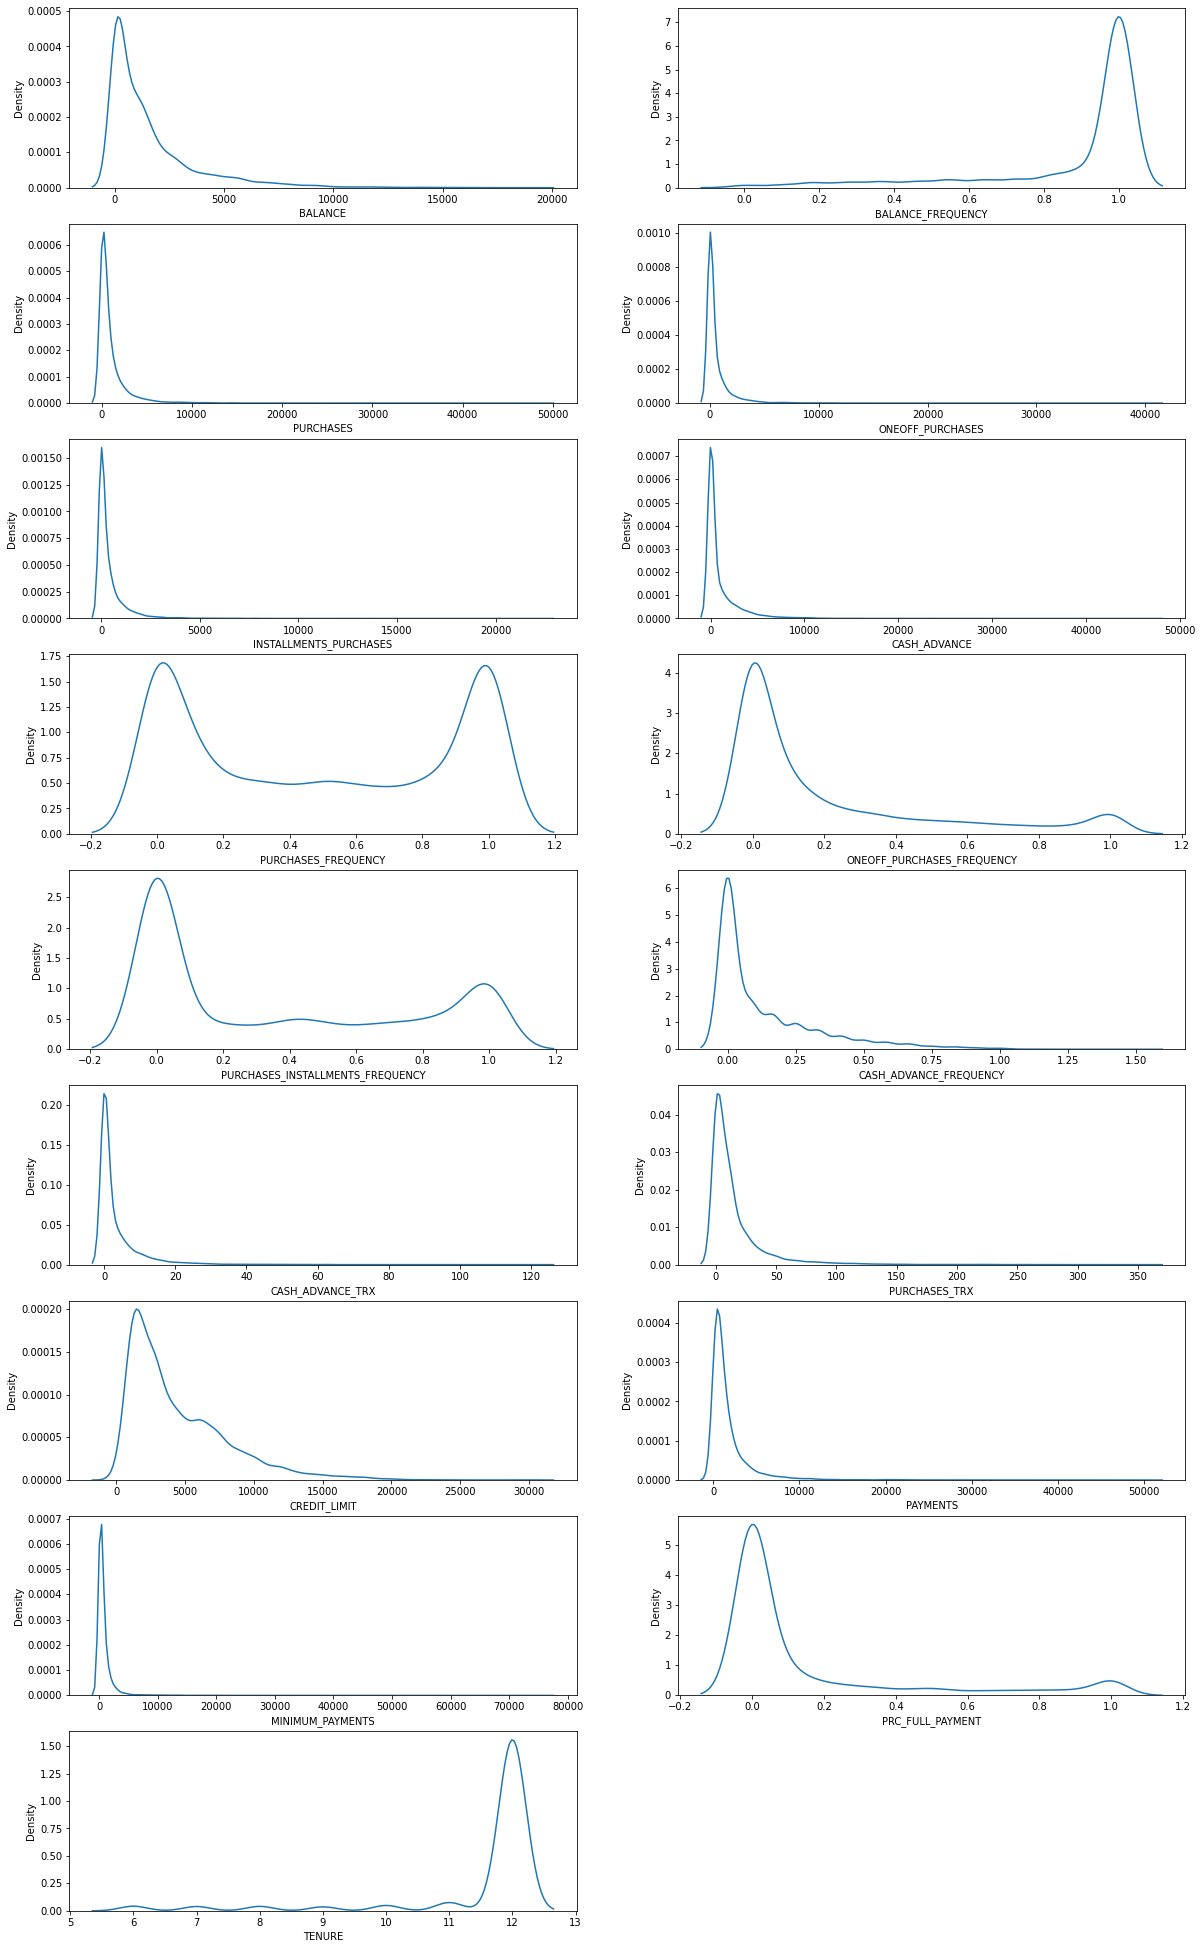

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
plt.show()

The data is heavily skewed and varied, so require further transformation.

First, handle missing values using median instead of mean due to data is heavily skewed.

In [ ]:
df_median_imputed = impute_median(data)

In [ ]:
df_log_transformed = log_transform(df_median_imputed, list(df_median_imputed.columns))
df_log_transformed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
C10002,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
C10003,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
C10004,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
C10005,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
C19187,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,1.945910
C19188,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910


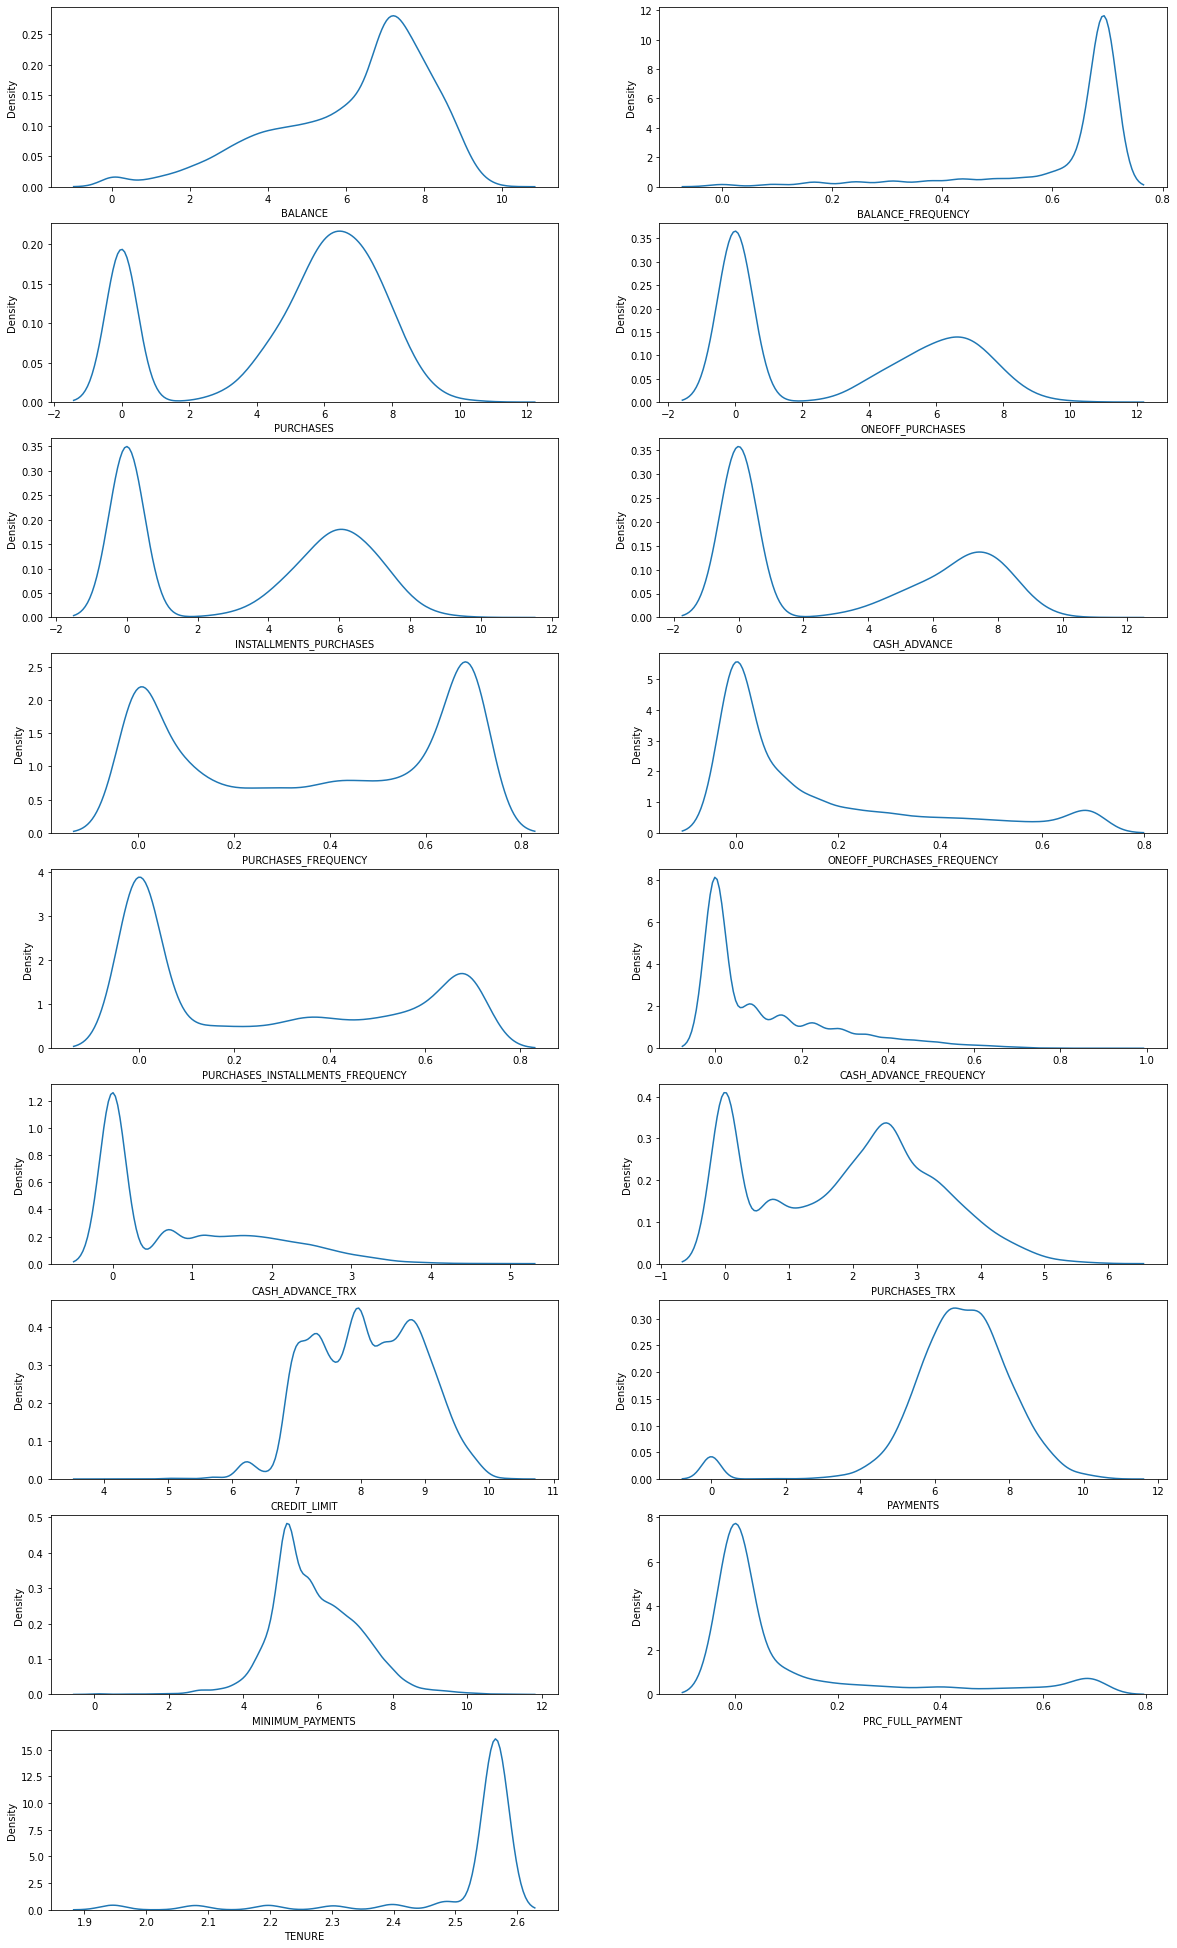

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_log_transformed.columns):
    if df_log_transformed[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_log_transformed[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

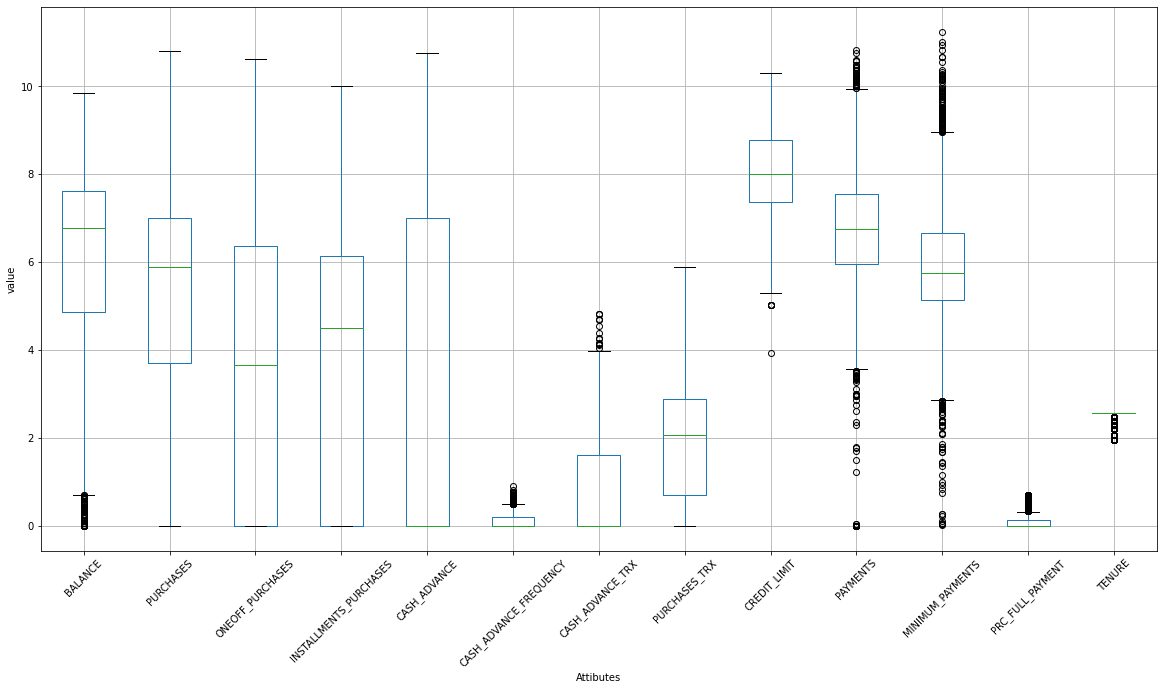

In [ ]:
df_log_transformed.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1).boxplot(figsize=(20,10));
plt.xticks(rotation=45);
plt.ylabel('value');
plt.xlabel('Attibutes');

In [ ]:
# list of attributes to be removed
unwanted_ele = ['CUST_ID']
# 
attribute_list = [ele for ele in list(df_log_transformed.columns) if ele not in unwanted_ele]

# remove outliers
df_without_outliers = iqr_outlier_removal(df_log_transformed,attribute_list)

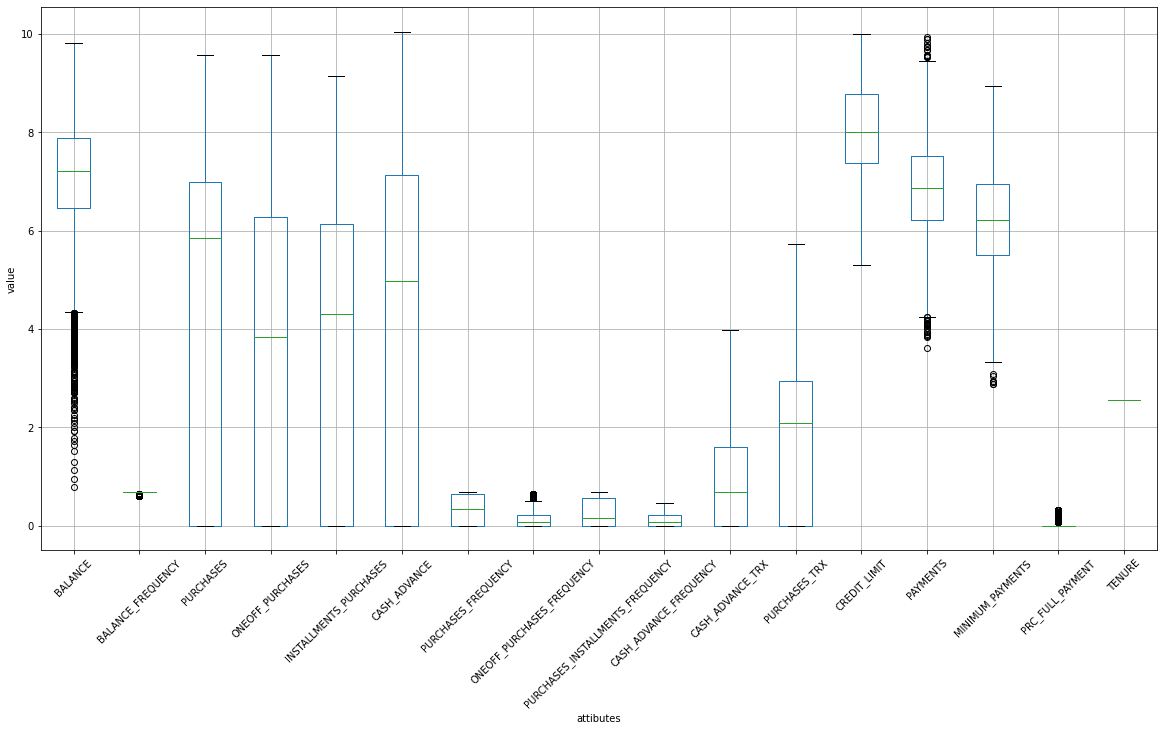

In [ ]:
df_without_outliers.boxplot(figsize=(20,10));
plt.xticks(rotation=45);
plt.ylabel('value');
plt.xlabel('attibutes');

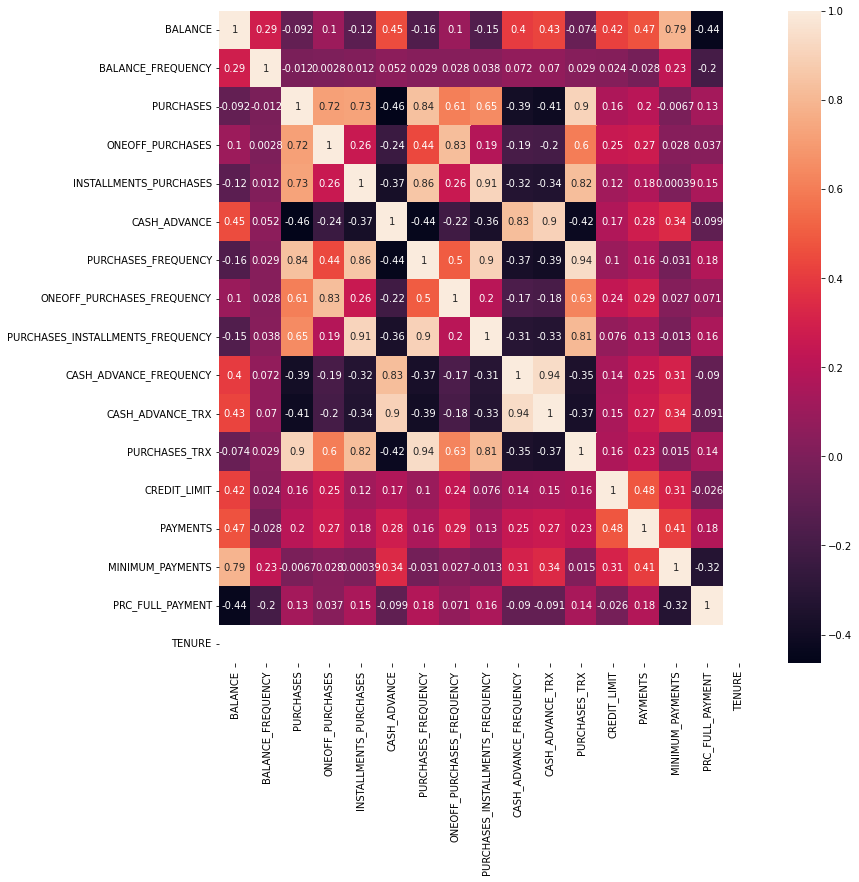

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_without_outliers.corr(), annot=True)
plt.show()

We can see that there are some correlated features here. 
Tackling collinearity issues by dimensionality reduction and bring these attributes to lower dimension, using PCA

In [ ]:
data_pca, pca = apply_pca(df_without_outliers)

In [ ]:
pca

PCA(n_components=2)

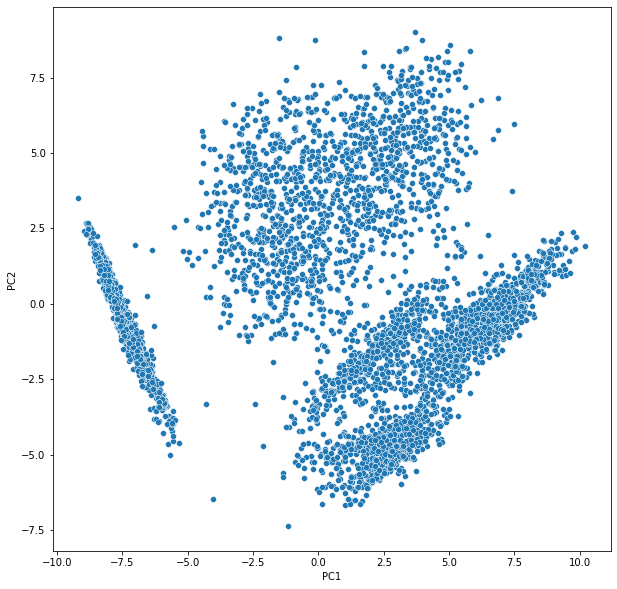

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.scatterplot(data=data_pca, x='PC1', y='PC2', ax=ax)

Now we done the preprocessing step. We have a cleaned dataset reduced to its principal components, we can use this for clustering models.

In [ ]:
data_pca.to_csv("/content/drive/MyDrive/credit-card-clustering/data/data_preprocessed.csv")

# Build model

## KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/credit-card-clustering/data/data_preprocessed.csv").set_index('CUST_ID')  # read data
df

,PC1,PC2
CUST_ID,,
C10001,0.977727,-6.019202
C10002,-8.378747,1.501084
C10005,-1.123715,-4.079621
C10006,3.731336,-3.660419
C10008,2.729357,-4.185211
...,...,...
C18980,3.230708,-5.049649
C18986,4.963817,-3.152891
C18993,1.397357,1.572474


In [ ]:
class KMeansModel():
    def __init__(self, data):
        self.data = data
    def kmeans_model(self, max_clusters, min_clusters=1):
        """
        Function to create multiple iterations of KMeans model
        Args:
            min_clusters: minimum number of clusters, default at 2
            max_clusters: maximum number of clusters
        Returns:
            kmeans_model: list of KMeans models
        """
        self.kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(self.data) 
                              for k in range(min_clusters, max_clusters)]
        innertia = [model.inertia_ for model in self.kmeans_models]
        
        plt.plot(range(min_clusters, max_clusters),innertia)
        plt.title('Elbow method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
        return self.kmeans_models
    
    def search_optimal_clusters(self):
        """
        Function to find optimal number of clusters
        
        Returns: 
            optimal_score: optimal cluster with the highest silhouette score
        """
        
        silhoutte_scores = [silhouette_score(self.data, model.labels_) for model in self.kmeans_models[1:]]
        silh_score = pd.DataFrame(silhoutte_scores, range(2, len(kmeans_models)+1), columns=['silhoutte_score'])
        
        plt.plot(silh_score, "bo-")
        plt.xticks(range(2, len(kmeans_models)+1))
        plt.title('Silhoutte scores vs Number of clusters')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhoutte score')
        
        self.optimal_score = silh_score.idxmax()
        
        return self.optimal_score['silhoutte_score']
    
    def optimal_model(self):
        """
        Function to execute the model with optimal parameters
        Returns:
            data_clusters (DataFrame): optimal model with labels
            optimal_kmeans (KMeans): optimal KMeans model
        """
        
        optimal_kmeans = KMeans(n_clusters=self.optimal_score['silhoutte_score'],
                                random_state=23).fit(self.data)
        data_clusters = self.data.copy()  # copy data
        data_clusters['cluster']= optimal_kmeans.labels_  # add cluster column
        
        print('Silhoutte score of our model is ' + str(silhouette_score(self.data, optimal_kmeans.labels_)))
        return data_clusters, optimal_kmeans
        
        

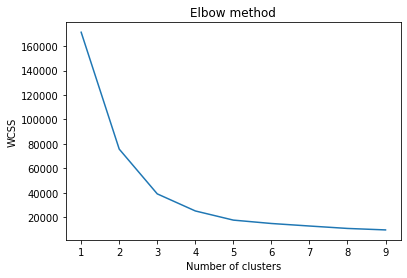

Silhoutte score of our model is 0.5562286011068958


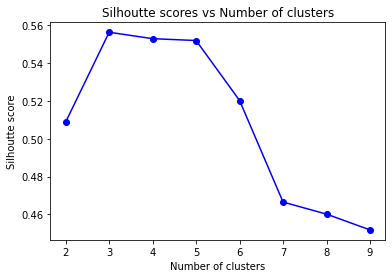

In [ ]:
kmeans = KMeansModel(df)  # instantiate kmeans
kmeans_models = kmeans.kmeans_model(min_clusters=1, max_clusters=10)  # run multiple iterations of kmeans
optimal_clusters = kmeans.search_optimal_clusters()
cluster_labels, optimal_kmeans = kmeans.optimal_model()

In [ ]:
optimal_kmeans

KMeans(n_clusters=3, random_state=23)

In [ ]:
cluster_labels


,PC1,PC2,cluster
CUST_ID,,,
C10001,0.977727,-6.019202,0
C10002,-8.378747,1.501084,2
C10005,-1.123715,-4.079621,0
C10006,3.731336,-3.660419,0
C10008,2.729357,-4.185211,0
...,...,...,...
C18980,3.230708,-5.049649,0
C18986,4.963817,-3.152891,0
C18993,1.397357,1.572474,1


## DBSCAN

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from matplotlib.pyplot import figure
from kneed import KneeLocator

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/credit-card-clustering/data/data_preprocessed.csv").set_index('CUST_ID')  # read data
data

,PC1,PC2
CUST_ID,,
C10001,0.977727,-6.019202
C10002,-8.378747,1.501084
C10005,-1.123715,-4.079621
C10006,3.731336,-3.660419
C10008,2.729357,-4.185211
...,...,...
C18980,3.230708,-5.049649
C18986,4.963817,-3.152891
C18993,1.397357,1.572474


In [ ]:
# Define parameters
MinPts = len(data.columns)*2  # MinPts should follow attribute*2
eps = 0.1  # epsilon

In [ ]:
class DBSCANModel():
    def __init__ (self,data):
        self.data = data
        
    def dbscan_model(self, eps, min_samples):
        """
        Function to run DBSCAN

        Args:
            eps (float): epsilon
            min_samples (int): minimum samples

        Returns:
            labelled_data (pandas dataframe): dataframe with labels
            self.labels (array): array of labels
        """

        X = self.data.values
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        self.labels = db.labels_
        
        n_clusters_ = len(set(self.labels)) - (1 if -1 in self.labels else 0)
        n_noise_ = list(self.labels).count(-1)
        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(X, self.labels))

        # adding cluster labels back to dataframe
        labelled_data = self.data.copy() # copy dataframe
        labelled_data['cluster'] = self.labels # add cluster labels back to standardised and pca df
        return labelled_data, self.labels

    def search_optimal_minpts (self, minpts):
        """
        Function to find optimal MinPts

        Args:
            minpts (int): minimum points

        Returns:
            distance (float): optimal epsilon value

        """       

        # Calculate average distance between each point in the data set and its nearest {MinPts} neighbours
        neigh = NearestNeighbors(n_neighbors=minpts) # using n_neighbours equivalent to minimum samples
        nbrs = neigh.fit(self.data)
        distances, indices = nbrs.kneighbors(self.data)

        # Sort distance values by ascending value and plot
        distances = np.sort(distances, axis=0)
        distances = distances[:,1]
        i = np.arange(len(distances))

        # Find the optimal MinPts
        kn = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        kn.plot_knee();
        plt.title('K-distance Graph',fontsize=20)
        plt.xlabel('Data Points sorted by distance',fontsize=14)
        plt.ylabel('Epsilon',fontsize=14)

        print(f'Optimal MinPts: {kn.knee}')
        print(f'Optimal Epsilon: {distances[kn.knee]}')
        
        return distances[kn.knee]

    def plot_dbscan(self):
        """ Function to plot DBSCAN """
        plt.figure(figsize=(10,7))
        plt.scatter(self.data['PC1'], self.data['PC2'], c=self.labels, cmap='rainbow')
        plt.title('DBSCAN')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

In [ ]:
dbscan_model = DBSCANModel(data)
cluster_labels, labels = dbscan_model.dbscan_model(eps, MinPts)

Estimated number of clusters: 55
Estimated number of noise points: 2914
Silhouette Coefficient: -0.265


In [ ]:
cluster_labels.cluster.value_counts()

-1     2914
 0     1102
 4       52
 9       39
 27      31
 6       28
 30      27
 24      21
 18      21
 3       20
 16      19
 8       18
 13      17
 34      17
 31      16
 5       15
 35      14
 1       14
 20      13
 36      12
 11      12
 29      10
 14      10
 32       9
 2        9
 33       9
 7        9
 50       8
 38       8
 43       8
 28       8
 22       8
 21       8
 10       7
 15       7
 45       7
 12       7
 41       7
 19       7
 17       7
 47       6
 37       6
 44       6
 53       6
 39       6
 23       6
 25       6
 26       6
 42       6
 52       6
 51       6
 40       6
 54       6
 46       6
 49       5
 48       4
Name: cluster, dtype: int64

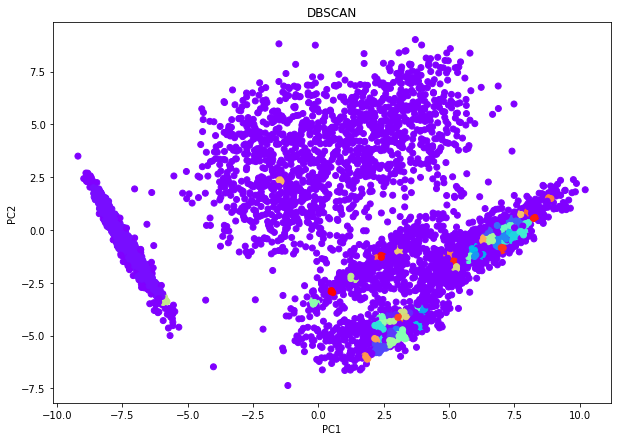

In [ ]:

dbscan_model.plot_dbscan()

Optimal MinPts: 4156
Optimal Epsilon: 0.15623159316074034


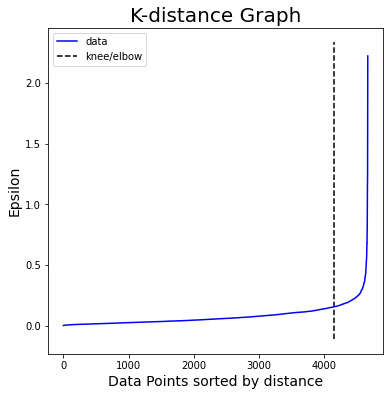

In [ ]:

optimal_eps = dbscan_model.search_optimal_minpts(MinPts)

In [ ]:

optimal_cluster_labels, optimal_labels = dbscan_model.dbscan_model(optimal_eps, MinPts)

Estimated number of clusters: 50
Estimated number of noise points: 1918
Silhouette Coefficient: -0.259


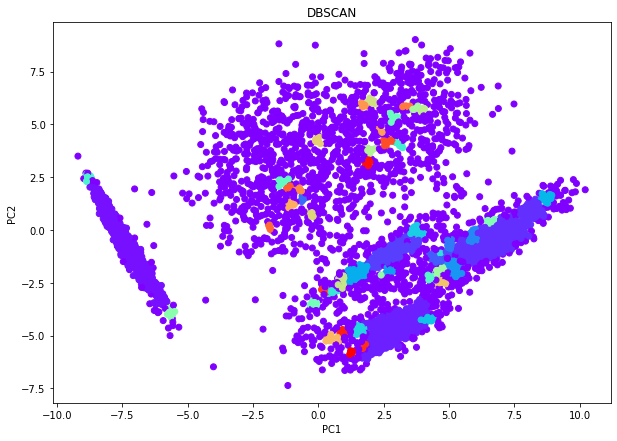

In [ ]:
dbscan_model.plot_dbscan()

# Run scripts

In [10]:
cd /content/drive/MyDrive/credit-card-clustering

/content/drive/MyDrive/credit-card-clustering


In [12]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!python main.py

config.yml
Traceback (most recent call last):
  File "main.py", line 50, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "main.py", line 28, in main
    data = pd.read_csv(data_config).set_index(['CUST_ID']) # read data
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-pa